# 1.Tracing rays

In [3]:
import matplotlib.pyplot as plt
from optiland import distribution
from optiland.samples.objectives import ReverseTelephoto

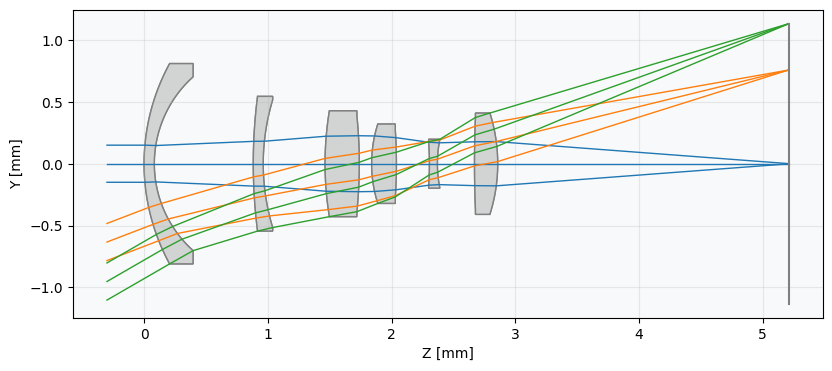

In [4]:
lens = ReverseTelephoto()
lens.draw()

### 追踪对象

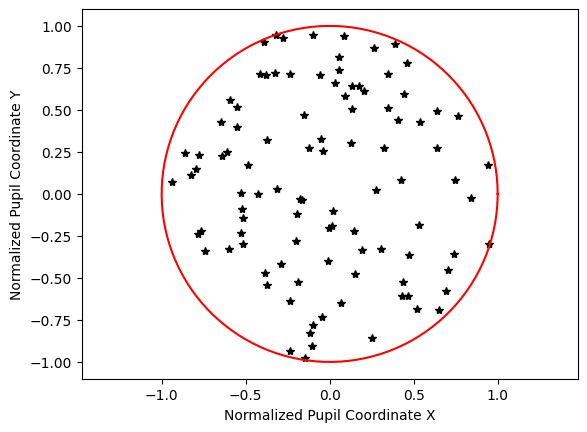

In [10]:
# 创建一个随机分布对象
dist_rand = distribution.RandomDistribution(seed=None)
# 生成50个随机点
dist_rand.generate_points(num_points=100)
dist_rand.view()

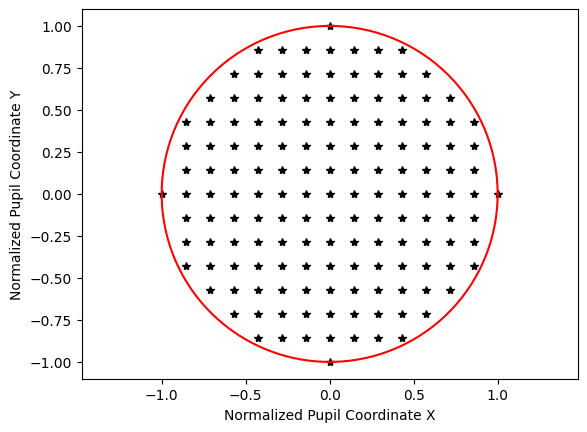

In [ ]:
# 创建一个均匀分布对象
dist_uniform = distribution.UniformDistribution()
dist_uniform.generate_points(num_points=15) #定义一个轴有多少个点即可
dist_uniform.view()

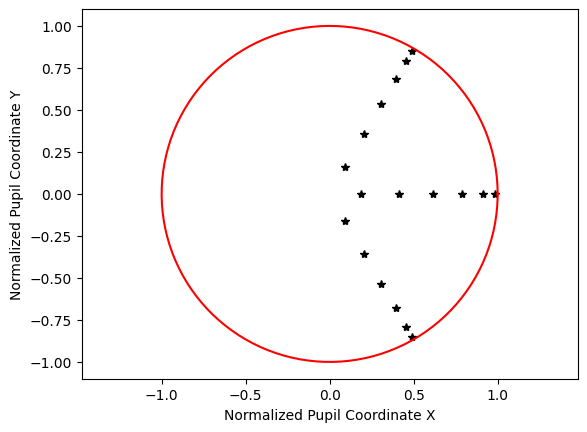

In [11]:
# 创建一个高斯分布对象
#论文：Forbes, “Optical system assessment for design: numerical ray tracing in the Gaussian pupil,” J. Opt. Soc. Am. A 5, 1943-1956 (1988)
dist_quad = distribution.GaussianQuadrature(is_symmetric=False)
dist_quad.generate_points(num_rings=6)
dist_quad.view()

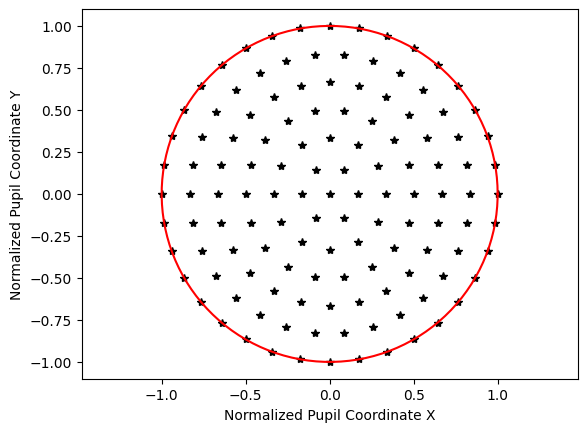

In [12]:
#   创建一个六角形分布对象
dist_hex = distribution.HexagonalDistribution()
dist_hex.generate_points(num_rings=6)
dist_hex.view()

### 追踪示例

In [37]:
rays = lens.trace(Hx=0, Hy=0, wavelength=0.55, num_rays=10, distribution="hexapolar")
# distribution_classes = {
#         "line_x": LineXDistribution,
#         "line_y": LineYDistribution,
#         "positive_line_x": lambda: LineXDistribution(positive_only=True),
#         "positive_line_y": lambda: LineYDistribution(positive_only=True),
#         "random": RandomDistribution,
#         "uniform": UniformDistribution,
#         "hexapolar": HexagonalDistribution,
#         "cross": CrossDistribution,
#         "ring": RingDistribution,
#     }

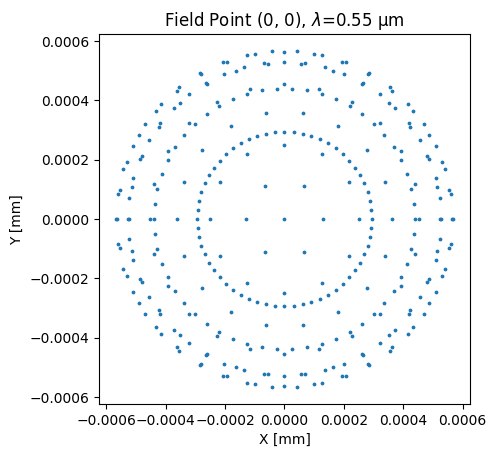

In [39]:
num_surfaces = lens.surface_group.num_surfaces # 计算光线与每个表面的交点

# take intersection points on last surface only
x_image = lens.surface_group.x[num_surfaces - 1, :] 
y_image = lens.surface_group.y[num_surfaces - 1, :]

plt.scatter(x_image, y_image, s=3)
plt.axis("image")
plt.xlabel("X [mm]")
plt.ylabel("Y [mm]")
plt.title("Field Point (0, 0), $\\lambda$=0.55 µm")
plt.show()

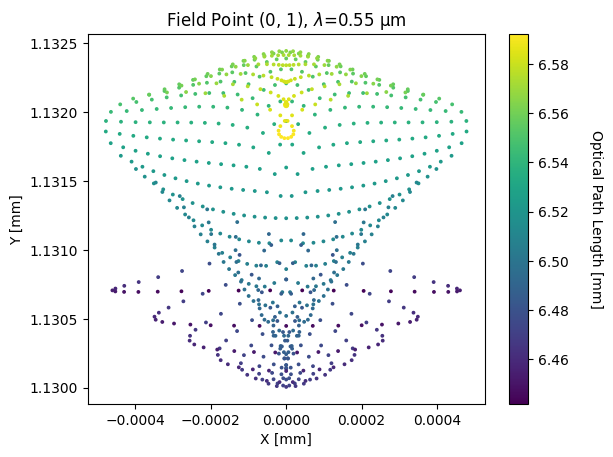

In [43]:
lens.trace(Hx=0, Hy=1, wavelength=0.55, num_rays=15, distribution="hexapolar")

opd = lens.surface_group.opd[num_surfaces - 1, :]
x_image = lens.surface_group.x[num_surfaces - 1, :]
y_image = lens.surface_group.y[num_surfaces - 1, :]

plt.scatter(x_image, y_image, s=3, c=opd)
plt.xlabel("X [mm]")
plt.ylabel("Y [mm]")
plt.title("Field Point (0, 1), $\\lambda$=0.55 µm")
cbar = plt.colorbar()   #添加colorbar
cbar.ax.get_yaxis().labelpad = 25   #设置colorbar的y轴标签位置
cbar.ax.set_ylabel("Optical Path Length [mm]", rotation=270)    #设置colorbar的y轴标签
plt.show()

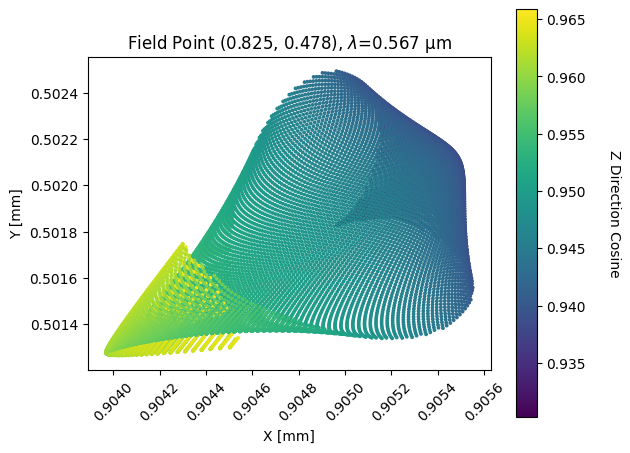

In [47]:
rays = lens.trace(
    Hx=0.825,
    Hy=0.478,
    wavelength=0.567,
    num_rays=128,
    distribution="uniform",
)

x_image = lens.surface_group.x[num_surfaces - 1, :]
y_image = lens.surface_group.y[num_surfaces - 1, :]
N = lens.surface_group.N[num_surfaces - 1, :]

plt.scatter(x_image, y_image, s=3, c=N)
plt.axis("image")
plt.xlabel("X [mm]")
plt.ylabel("Y [mm]")
plt.title("Field Point (0.825, 0.478), $\\lambda$=0.567 µm")
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel("Z Direction Cosine", rotation=270)
plt.xticks(rotation=45) # 设置x轴刻度标签旋转45度
plt.tight_layout()      # 自动调整子图参数，使之填充整个图像区域
plt.show()

# 2. Tilting & De-centering Components

In [49]:
import numpy as np
from optiland import analysis,optic

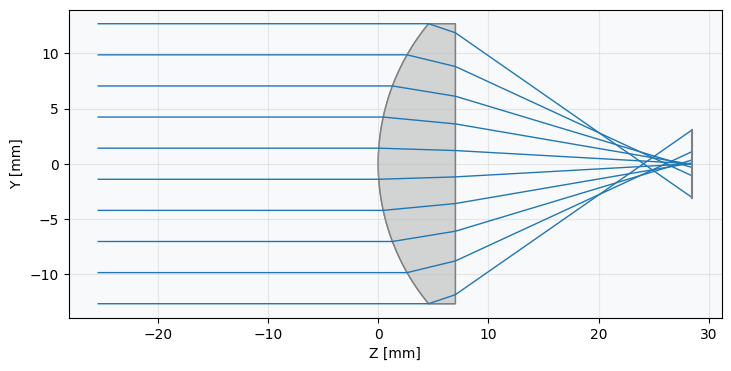

In [ ]:
#We start with a simple lens with all surfaces aligned
lens = optic.Optic()

# add surfaces
lens.add_surface(index=0, radius=np.inf, thickness=np.inf)
lens.add_surface(index=1, thickness=7, radius=19.93, is_stop=True, material="N-SF11")
lens.add_surface(index=2, thickness=21.48)
lens.add_surface(index=3)

#add aperture
lens.set_aperture(aperture_type="EPD",value=25.4)

# add field
lens.set_field_type(field_type="angle")
lens.add_field(y=0)

# add wavelength
lens.add_wavelength(value=0.587,is_primary=True)

lens.draw(num_rays=10)

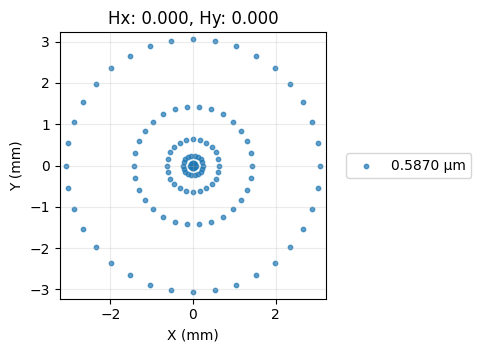

In [53]:
spot = analysis.SpotDiagram(lens)
spot.view()

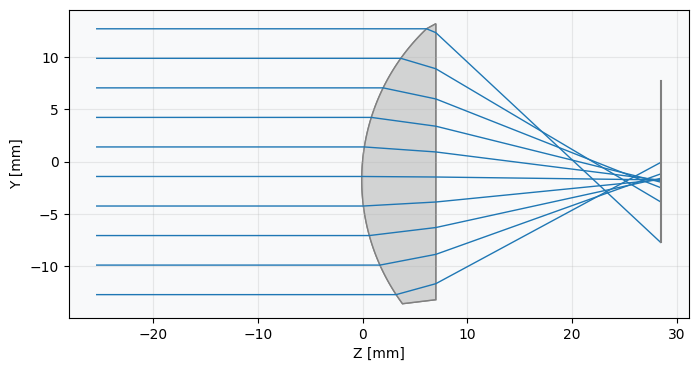

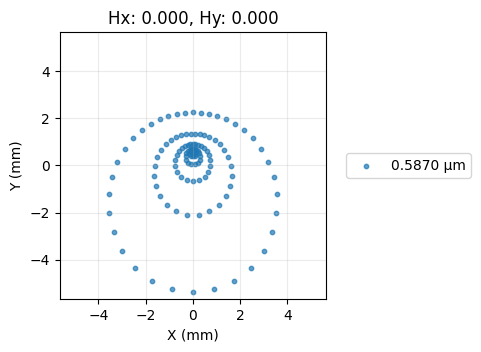

In [55]:
#Now, let’s tilt the first surface by 5 degrees and redraw the lens.
lens = optic.Optic()

# add surfaces
lens.add_surface(index=0, radius=np.inf, thickness=np.inf)

# == WE ADD THE TILT TO THIS SURFACE ===============
lens.add_surface(
    index=1,
    thickness=7,
    radius=19.93,
    is_stop=True,
    material="N-SF11",
    rx=np.radians(5.0), # tilt about x-axis
)
# ==================================================

lens.add_surface(index=2, thickness=21.48)
lens.add_surface(index=3)

# add aperture
lens.set_aperture(aperture_type="EPD", value=25.4)

# add field
lens.set_field_type(field_type="angle")
lens.add_field(y=0)

# add wavelength
lens.add_wavelength(value=0.587, is_primary=True)

lens.draw(num_rays=10)

spot = analysis.SpotDiagram(lens)
spot.view()

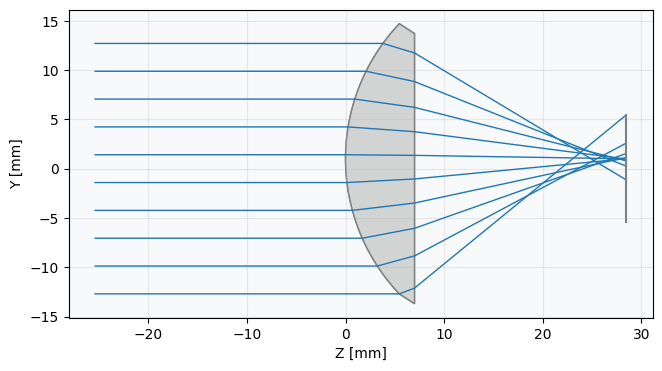

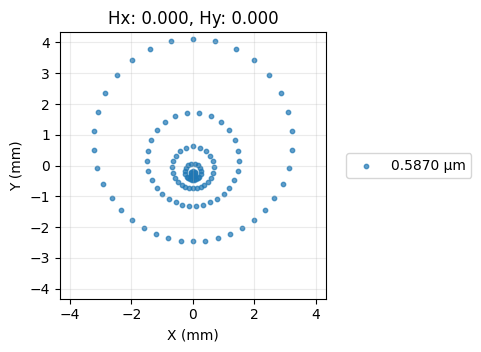

In [56]:
#Let’s decenter the first surface of the lens
lens = optic.Optic()

# add surfaces
lens.add_surface(index=0, radius=np.inf, thickness=np.inf)

# == WE DECENTER THIS SURFACE =====================
lens.add_surface(
    index=1,
    thickness=7,
    radius=19.93,
    is_stop=True,
    material="N-SF11",
    dy=1.0,  # 1 mm decenter
)
# ==================================================

lens.add_surface(index=2, thickness=21.48)

lens.add_surface(index=3)

# add aperture
lens.set_aperture(aperture_type="EPD", value=25.4)

# add field
lens.set_field_type(field_type="angle")
lens.add_field(y=0)

# add wavelength
lens.add_wavelength(value=0.587, is_primary=True)

lens.draw(num_rays=10)

spot = analysis.SpotDiagram(lens)
spot.view()

# 3.Monte Carlo Raytracing Methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from optiland import analysis, materials, optic, wavefront

num_systems = 1000

# set random seed for repeatability
np.random.seed(42)
# generate random parameters for each system

# lens parameters
refractive_index = np.random.normal(loc=1.5, scale=1e-3, size=num_systems)  # refractive index
radius_of_curvature = np.random.normal(loc=100, scale=0.5, size=num_systems) # radius of curvature

In [60]:
class SingletConfigurable(optic.Optic):
    """A configurable plano-convex singlet"""

    def __init__(self, radius_of_curvature, refractive_index):
        super().__init__()

        # define the material for the singlet
        ideal_material = materials.IdealMaterial(n=refractive_index, k=0)

        # add surfaces
        self.add_surface(index=0, radius=np.inf, thickness=np.inf)
        self.add_surface(
            index=1,
            thickness=5,
            radius=radius_of_curvature,
            is_stop=True,
            material=ideal_material,
        )
        self.add_surface(index=2, thickness=196.667)
        self.add_surface(index=3)

        # add aperture
        self.set_aperture(aperture_type="EPD", value=25.4)

        # add field
        self.set_field_type(field_type="angle")
        self.add_field(y=0)

        # add wavelength
        self.add_wavelength(value=0.55, is_primary=True)

        self.update_paraxial()

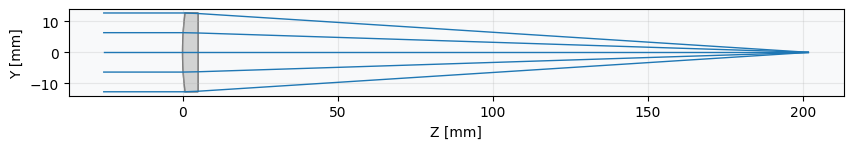

In [62]:
lens = SingletConfigurable(radius_of_curvature[0], refractive_index[0])
lens.draw(num_rays=5)

In [ ]:
#run the Monte Carlo simulation. In each of the 1000 iterations
#we generate a random system, compute the rms spot radius and rms wavefront error
#and record these values for later analysis.
rms_spot_radius = []
rms_wavefront_error = []

for k in range(num_systems):
    # generate a random singlet
    lens = SingletConfigurable(radius_of_curvature[k], refractive_index[k])

    # get value of rms spot radius at field index = 0 and wavelength index = 0
    spot = analysis.SpotDiagram(lens)
    value = spot.rms_spot_radius()[0][0]
    rms_spot_radius.append(value)

    # get rms wavefront error
    opd = wavefront.OPD(lens, field=(0, 0), wavelength=0.55)
    rms_wavefront_error.append(opd.rms())

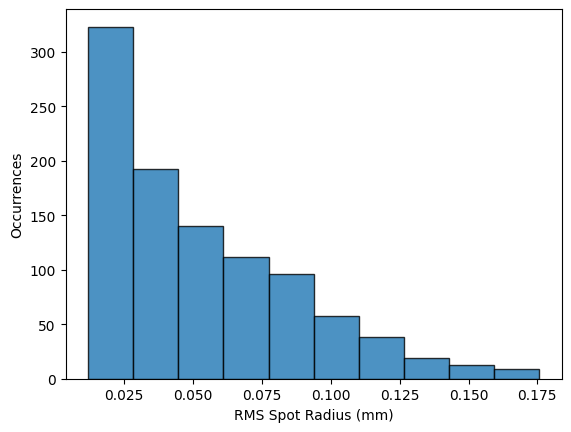

In [65]:
plt.hist(rms_spot_radius, color="C0", edgecolor="k", alpha=0.8)
plt.xlabel("RMS Spot Radius (mm)")
plt.ylabel("Occurrences")
plt.show()

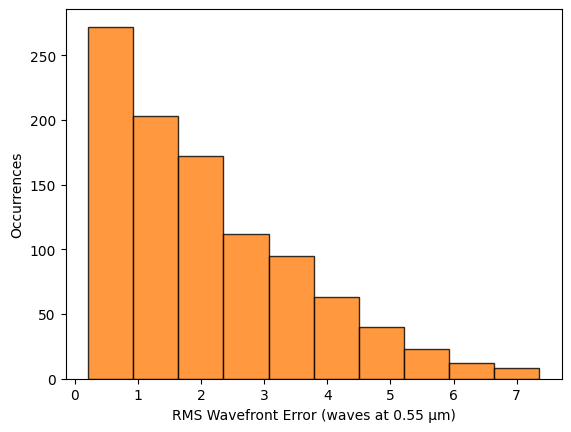

In [67]:
plt.hist(rms_wavefront_error, color="C1", edgecolor="k", alpha=0.8)
plt.xlabel("RMS Wavefront Error (waves at 0.55 µm)")
plt.ylabel("Occurrences")
plt.show()

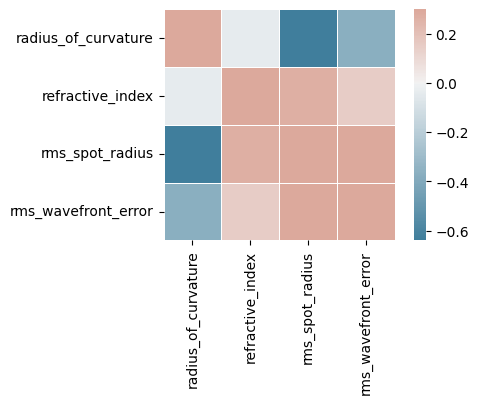

In [71]:
#Let’s dive deeper into the relationships by looking at the correlation matrix
import seaborn as sns  # pip install seaborn

df = pd.DataFrame(
    dict(
        radius_of_curvature=radius_of_curvature,
        refractive_index=refractive_index,
        rms_spot_radius=rms_spot_radius,
        rms_wavefront_error=rms_wavefront_error,
    ),
)

# This cell is based on https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=0.5)

plt.show()

# 4.Raytracing Aspheres

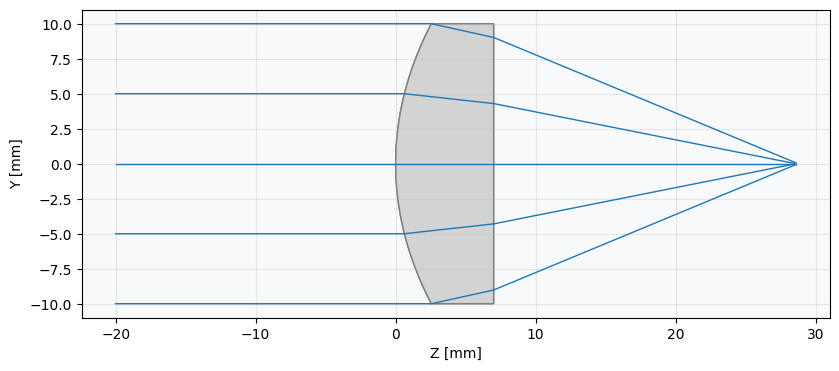

In [74]:
import numpy as np

from optiland import analysis, optic

asphere = optic.Optic()

# add surfaces
asphere.add_surface(index=0, radius=np.inf, thickness=np.inf)
asphere.add_surface(
    index=1,
    thickness=7,
    radius=20.0,
    is_stop=True,
    material="N-SF11",
    surface_type="even_asphere",    # <-- asphere surface
    conic=0.0,
    coefficients=[
        -2.248851e-4,
        -4.690412e-6,
        -6.404376e-8,
    ],  # <-- coefficients for asphere
)
asphere.add_surface(index=2, thickness=21.56201105)
asphere.add_surface(index=3)

# add aperture
asphere.set_aperture(aperture_type="EPD", value=20.0)

# add field
asphere.set_field_type(field_type="angle")
asphere.add_field(y=0)

# add wavelength
asphere.add_wavelength(value=0.587, is_primary=True)

asphere.update_paraxial()

asphere.draw(num_rays=5)

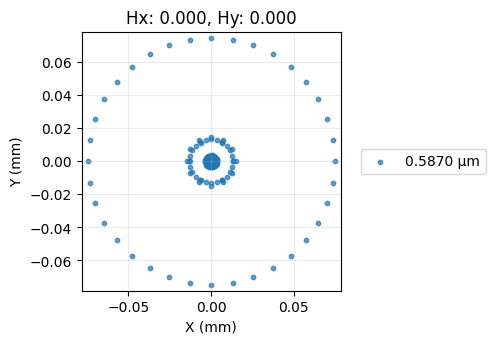

In [75]:
spot = analysis.SpotDiagram(asphere)
spot.view()